<a href="https://colab.research.google.com/github/ketanp23/pgpmciclass/blob/main/embeddings_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Python program to generate word vectors using Word2Vec
import nltk
nltk.download('punkt_tab')


# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from sklearn.decomposition import PCA
from matplotlib import pyplot

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
f = "This is a cute Dog. My Cat is Cute" #Sentence

In [ ]:
data = []

In [ ]:
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)


In [ ]:
# Print results
print("Cosine similarity between 'cat' " +
      "and 'dog' - CBOW : ",
      model1.wv.similarity('cat', 'dog'))


Cosine similarity between 'cat' and 'dog' - CBOW :  0.0640898


In [ ]:
print("Cosine similarity between 'is' " +
      "and 'cute' - CBOW : ",
      model1.wv.similarity('is', 'cute'))

Cosine similarity between 'is' and 'cute' - CBOW :  -0.010839177


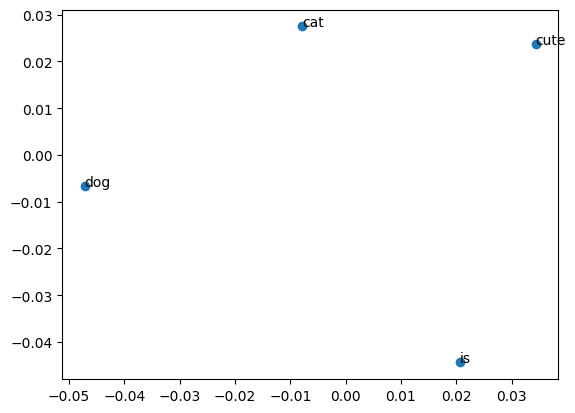

In [ ]:
#Visualizing data
words = ["cat", "dog", "is", "cute"]

X = model1.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()